In [478]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [479]:
data_original = pd.read_csv("./Results_original.csv")
data_kronecker = pd.read_csv("./Results_kronecker.csv")
error_data = data_kronecker.copy(deep = True)

In [480]:
data_kronecker.head()

,network_size,centrality_measure,base_network,10rem_nodes_mean,10rem_nodes_SD,10rem_edges_mean,10rem_edges_SD,10rempropor_edges_mean,10rempropor_edges_SD,10add_edges_mean,10add_edges_SD,30rem_nodes_mean,30rem_nodes_SD,30rem_edges_mean,30rem_edges_SD,30rempropor_edges_mean,30rempropor_edges_SD,30add_edges_mean,30add_edges_SD
0,8,degree,Jazz,0.929800,0.106330,0.908398,0.057671,0.924772,0.055572,0.912731,0.054456,NaN,NaN,0.743255,0.176905,0.784675,0.142740,0.792847,0.122837
1,16,degree,Jazz,0.927437,0.038724,0.875756,0.045550,0.878034,0.045676,0.921059,0.048677,0.770826,0.157451,0.751601,0.089083,0.738199,0.092552,0.861832,0.068433
2,32,degree,Jazz,0.894108,0.083444,0.890950,0.032118,0.902109,0.031976,0.911668,0.035444,0.768732,0.136813,0.759877,0.059681,0.763549,0.055985,0.835314,0.049075
3,64,degree,Jazz,0.915821,0.044540,0.914480,0.018285,0.926323,0.017982,0.907509,0.020482,0.784053,0.078653,0.778699,0.035719,0.789927,0.034804,0.798218,0.033234
4,128,degree,Jazz,0.938318,0.010789,0.931797,0.006615,0.938995,0.006047,0.920331,0.007989,0.854056,0.021251,0.843469,0.013924,0.843817,0.013453,0.842933,0.014476


In [483]:
data_jazz = data_kronecker[data_kronecker["base_network"] == "Jazz"]

data_jazz_degree = data_jazz[data_jazz["centrality_measure"] == "degree"]
data_jazz_eigenvector = data_jazz[data_jazz["centrality_measure"] == "eigenvector" ]
data_jazz_pagerank = data_jazz[data_jazz["centrality_measure"] == "pagerank" ]

data_dolphins = data_kronecker[data_kronecker["base_network"] == "Dolphins"]

data_dolphins_degree = data_dolphins[data_dolphins["centrality_measure"] == "degree" ]
data_dolphins_eigenvector = data_dolphins[data_dolphins["centrality_measure"] == "eigenvector" ]
data_dolphins_pagerank = data_dolphins[data_dolphins["centrality_measure"] == "pagerank" ]


In [484]:
network_sizes = np.unique(data_kronecker.network_size)

In [485]:
#data_jazz_degree = data_jazz_degree.iloc[1:,]
#data_dolphins_eigenvector = data_dolphins_eigenvector.iloc[2:,]
#data_jazz_eigenvector = data_jazz_eigenvector.iloc[2:,]

## Calculate percent error

In [486]:
def calculate_percent_error(original_values, kronecker_values):
    
    numpy_original = np.array(original_values)
    
    numpy_kronecker = np.array(kronecker_values)
    
    return (np.abs(numpy_original - numpy_kronecker)/numpy_original) *100

In [487]:
networks = ["Jazz", "Dolphins"]

centrality_measures = ["degree", "eigenvector", "pagerank"]

error_measures = data_kronecker.columns[3:]

repeat_num = len(np.unique(data_kronecker.network_size))

index = 0

for network in networks:
    
    for centrality_measure in centrality_measures:
        
        query = 'base_network == "' + network + '" & centrality_measure == "'+ centrality_measure+'"' 
        
        original_values = data_original.query(query)
        
        for error_measure in error_measures:
            
            original_values_repeat = np.array(np.repeat(original_values[error_measure], repeat_num))
            
            kronecker_values = data_kronecker.query(query)[error_measure].values
            
            error_temp = calculate_percent_error(original_values_repeat, kronecker_values)
            
            error_data.loc[error_data.query(query).index,error_measure] = error_temp
            
            #index = index + 1

In [488]:
error_data_jazz = error_data[error_data["base_network"] == "Jazz"]

error_data_jazz_degree = error_data_jazz[error_data_jazz["centrality_measure"] == "degree"]
error_data_jazz_eigenvector = error_data_jazz[error_data_jazz["centrality_measure"] == "eigenvector" ]
error_data_jazz_pagerank = error_data_jazz[error_data_jazz["centrality_measure"] == "pagerank" ]

error_data_dolphins = error_data[error_data["base_network"] == "Dolphins"]

error_data_dolphins_degree = error_data_dolphins[error_data_dolphins["centrality_measure"] == "degree" ]
error_data_dolphins_eigenvector = error_data_dolphins[error_data_dolphins["centrality_measure"] == "eigenvector" ]
error_data_dolphins_pagerank = error_data_dolphins[error_data_dolphins["centrality_measure"] == "pagerank" ]

In [489]:
#error_data_jazz_degree = error_data_jazz_degree.iloc[1:,]
#error_data_dolphins_eigenvector = error_data_dolphins_eigenvector.iloc[2:,]
#error_data_jazz_eigenvector = error_data_jazz_eigenvector.iloc[2:,]

In [490]:
error_data.head()

,network_size,centrality_measure,base_network,10rem_nodes_mean,10rem_nodes_SD,10rem_edges_mean,10rem_edges_SD,10rempropor_edges_mean,10rempropor_edges_SD,10add_edges_mean,10add_edges_SD,30rem_nodes_mean,30rem_nodes_SD,30rem_edges_mean,30rem_edges_SD,30rempropor_edges_mean,30rempropor_edges_SD,30add_edges_mean,30add_edges_SD
0,8,degree,Jazz,3.265025,1059.050707,4.809149,1603.040777,3.296672,1525.042071,3.965123,1390.346865,NaN,NaN,17.290048,2432.804114,11.705115,1687.235962,12.176840,1787.046867
1,16,degree,Jazz,3.510874,322.110758,8.229660,1245.103028,8.184072,1235.655256,3.088899,1232.181677,15.496849,711.681323,16.361330,1175.426921,16.934767,1058.837609,4.535462,951.287711
2,32,degree,Jazz,6.978357,809.585819,6.637542,848.459732,5.666541,835.064009,4.076988,870.028614,15.726482,605.289579,15.440408,754.470936,14.082235,600.988851,7.472760,653.895819
3,64,degree,Jazz,4.719307,385.505568,4.171813,439.948954,3.134525,425.844704,4.514591,460.539828,14.046853,305.468228,13.345898,411.404562,11.114094,335.775293,11.581873,410.544123
4,128,degree,Jazz,2.378812,17.602382,2.357164,95.329038,1.809378,76.828507,3.165544,118.628759,6.372652,9.551965,6.138167,99.351887,5.050105,68.449545,6.628851,122.383997


In [491]:
data_dolphins_degree

,network_size,centrality_measure,base_network,10rem_nodes_mean,10rem_nodes_SD,10rem_edges_mean,10rem_edges_SD,10rempropor_edges_mean,10rempropor_edges_SD,10add_edges_mean,10add_edges_SD,30rem_nodes_mean,30rem_nodes_SD,30rem_edges_mean,30rem_edges_SD,30rempropor_edges_mean,30rempropor_edges_SD,30add_edges_mean,30add_edges_SD
22,8,degree,Dolphins,0.822271,0.128402,0.827619,0.073964,0.826590,0.069876,0.875404,0.072042,NaN,NaN,0.690263,0.125172,0.678998,0.112234,0.804170,0.133944
23,16,degree,Dolphins,0.850395,0.092018,0.871635,0.044768,0.881793,0.045288,0.883536,0.047304,NaN,NaN,0.721392,0.103222,0.722703,0.102798,0.755041,0.088595
24,32,degree,Dolphins,0.901026,0.077265,0.900009,0.033686,0.918717,0.030689,0.924799,0.033066,0.780576,0.129910,0.767379,0.061466,0.800430,0.056762,0.835950,0.047938
25,64,degree,Dolphins,0.910624,0.047787,0.903930,0.021768,0.919917,0.019904,0.895417,0.024899,0.763381,0.076109,0.753509,0.042807,0.781484,0.036447,0.759765,0.040477
26,128,degree,Dolphins,0.924247,0.026945,0.926371,0.012632,0.943193,0.011746,0.920211,0.014195,0.807785,0.048940,0.806313,0.024812,0.834730,0.021941,0.815480,0.023526
27,256,degree,Dolphins,0.930207,0.024600,0.928073,0.009618,0.944904,0.007557,0.924012,0.010327,0.810070,0.040132,0.809018,0.017707,0.844788,0.014494,0.830509,0.014638
28,512,degree,Dolphins,0.930381,0.021953,0.928469,0.006727,0.942819,0.005646,0.920812,0.007477,0.810067,0.031762,0.805389,0.013179,0.840512,0.010275,0.815631,0.011052
29,1024,degree,Dolphins,0.929410,0.018950,0.927896,0.004973,0.943388,0.004239,0.913900,0.005720,0.808601,0.025083,0.806807,0.009328,0.844798,0.007499,0.804593,0.008647
30,2048,degree,Dolphins,0.933411,0.011769,0.932632,0.003479,0.950476,0.002891,0.919903,0.003849,0.819090,0.016740,0.818051,0.006587,0.860593,0.004976,0.812111,0.005596
31,4096,degree,Dolphins,0.933398,0.010259,0.933215,0.002573,0.950261,0.002009,0.916196,0.002937,0.820635,0.013761,0.819228,0.004744,0.861718,0.003431,0.803199,0.004073


In [492]:
marker_size = 80
font_size = 14

## Degree Centrality True Robustenss Dolphins and Jazz

In [493]:
def mask_datapoints(values):
    
    return values[np.isfinite(values)]

def x_axis_mask(xaxis, values):
    
    mask = np.isfinite(values)
    
    return xaxis[mask]
    

In [494]:
print(np.min(data_kronecker["10add_edges_mean"]))
print(np.min(data_kronecker["10rem_edges_mean"]))
print(np.min(data_kronecker["10rem_nodes_mean"]))
print(np.min(data_kronecker["10rempropor_edges_mean"]))
print(np.min(data_kronecker["30add_edges_mean"]))
print(np.min(data_kronecker["30rem_edges_mean"]))
print(np.min(data_kronecker["30rem_nodes_mean"]))
print(np.min(data_kronecker["30rempropor_edges_mean"]))

0.7847084220999999
0.7422902008
0.7344110245000001
0.7141589840000001
0.6408933706000001
0.5355874155
0.579222355
0.42795528340000005


In [513]:
def plot_results(x, y, ylim_low, ylim_high, filename, error=False):
    f, figures = plt.subplots(2,2, sharex=False,figsize=(15,10))
    x_axis = network_sizes
    tick_size = 14
    fontname="Times New Roman Bold"
    y_label = "True Robustness"
    if(error):
        y_label = "Percentage Error"

    #dolphins 10%
    figures[0][0].plot(x_axis_mask(x_axis, x["10add_edges_mean"]), 
                       mask_datapoints(x["10add_edges_mean"]), "--",color="blue")
    figures[0][0].plot(x_axis_mask(x_axis, x["10rem_edges_mean"]), 
                       mask_datapoints(x["10rem_edges_mean"]), "--", color="green")
    figures[0][0].plot(x_axis_mask(x_axis, x["10rem_nodes_mean"]),
                       mask_datapoints(x["10rem_nodes_mean"]), "--", color="red")
    figures[0][0].plot(x_axis_mask(x_axis, x["10rempropor_edges_mean"]),
                       mask_datapoints(x["10rempropor_edges_mean"]), "--", color="orange")

    figures[0][0].set_xlabel("Network Size", fontsize=font_size)
    figures[0][0].set_ylabel(y_label,fontsize=font_size)
    figures[0][0].set_xlabel("Network Size", fontsize=font_size)
    figures[0][0].set_title("Dolphins 10% Error Level", fontsize=font_size, fontweight='bold')
    figures[0][0].set_xscale('log', basex=2)
    figures[0][0].tick_params(axis='x',labelsize=tick_size)
    if(error):
        figures[0][0].axvline(x=62)


    figures[0][0].scatter(x_axis_mask(x_axis, x["10add_edges_mean"]), 
                       mask_datapoints(x["10add_edges_mean"]), color="blue", marker='o', s=marker_size)
    figures[0][0].scatter(x_axis_mask(x_axis, x["10rem_edges_mean"]), 
                       mask_datapoints(x["10rem_edges_mean"]), color="green", marker='s', s=marker_size)
    figures[0][0].scatter(x_axis_mask(x_axis, x["10rem_nodes_mean"]),
                       mask_datapoints(x["10rem_nodes_mean"]), color="red", marker='^', s=marker_size)
    figures[0][0].scatter(x_axis_mask(x_axis, x["10rempropor_edges_mean"]),
                       mask_datapoints(x["10rempropor_edges_mean"]), color="orange", marker="P", s=marker_size)

    figures[0][0].set_ylim(ylim_low, ylim_high)


    figures[0][0].text(0.5,-0.25, "(a)", size=16, ha="center", 
             transform=figures[0][0].transAxes)



    #jazz 10%
    figures[0][1].plot(x_axis_mask(x_axis, y["10add_edges_mean"]), 
                       mask_datapoints(y["10add_edges_mean"]), "--",color="blue")
    figures[0][1].plot(x_axis_mask(x_axis, y["10rem_edges_mean"]), 
                       mask_datapoints(y["10rem_edges_mean"]), "--", color="green")
    figures[0][1].plot(x_axis_mask(x_axis, y["10rem_nodes_mean"]),
                       mask_datapoints(y["10rem_nodes_mean"]), "--", color="red")
    figures[0][1].plot(x_axis_mask(x_axis, y["10rempropor_edges_mean"]),
                       mask_datapoints(y["10rempropor_edges_mean"]), "--", color="orange")

    figures[0][1].set_xlabel("Network Size", fontsize=font_size)
    figures[0][1].set_ylabel(y_label,fontsize=font_size)
    figures[0][1].set_xlabel("Network Size", fontsize=font_size)
    figures[0][1].set_title("Jazz 10% Error Level", fontsize=font_size, fontweight='bold')
    figures[0][1].set_xscale('log', basex=2)
    figures[0][1].scatter(x_axis_mask(x_axis, y["10add_edges_mean"]), 
                       mask_datapoints(y["10add_edges_mean"]), color="blue", marker='o', s=marker_size)
    figures[0][1].scatter(x_axis_mask(x_axis, y["10rem_edges_mean"]), 
                       mask_datapoints(y["10rem_edges_mean"]), color="green", marker='s', s=marker_size)
    figures[0][1].scatter(x_axis_mask(x_axis, y["10rem_nodes_mean"]),
                       mask_datapoints(y["10rem_nodes_mean"]), color="red", marker='^', s=marker_size)
    figures[0][1].scatter(x_axis_mask(x_axis, y["10rempropor_edges_mean"]),
                       mask_datapoints(y["10rempropor_edges_mean"]), color="orange", marker="P", s=marker_size)

    figures[0][1].set_ylim(ylim_low, ylim_high)
    figures[0][1].text(0.5,-0.25, "(b)", size=16, ha="center", 
             transform=figures[0][1].transAxes)
    figures[0][1].tick_params(axis='x',labelsize=tick_size)
    if(error):
        figures[0][1].axvline(x=198)


    # dolphins 30%
    figures[1][0].plot(x_axis_mask(x_axis, x["30add_edges_mean"]), 
                       mask_datapoints(x["30add_edges_mean"]), "--",color="blue")
    figures[1][0].plot(x_axis_mask(x_axis, x["30rem_edges_mean"]), 
                       mask_datapoints(x["30rem_edges_mean"]), "--", color="green")
    figures[1][0].plot(x_axis_mask(x_axis, x["30rem_nodes_mean"]),
                       mask_datapoints(x["30rem_nodes_mean"]), "--", color="red")
    figures[1][0].plot(x_axis_mask(x_axis, x["30rempropor_edges_mean"]),
                       mask_datapoints(x["30rempropor_edges_mean"]), "--", color="orange")

    figures[1][0].set_xlabel("Network Size", fontsize=font_size)
    figures[1][0].set_ylabel(y_label,fontsize=font_size)
    figures[1][0].set_xlabel("Network Size", fontsize=font_size)
    figures[1][0].set_title("Dolphins 30% Error Level", fontsize=font_size, fontweight='bold')
    figures[1][0].set_xscale('log', basex=2)
    figures[1][0].scatter(x_axis_mask(x_axis, x["30add_edges_mean"]), 
                       mask_datapoints(x["30add_edges_mean"]), color="blue", marker='o', s=marker_size)
    figures[1][0].scatter(x_axis_mask(x_axis, x["30rem_edges_mean"]), 
                       mask_datapoints(x["30rem_edges_mean"]), color="green", marker='s', s=marker_size)
    figures[1][0].scatter(x_axis_mask(x_axis, x["30rem_nodes_mean"]),
                       mask_datapoints(x["30rem_nodes_mean"]), color="red", marker='^', s=marker_size)
    figures[1][0].scatter(x_axis_mask(x_axis, x["30rempropor_edges_mean"]),
                       mask_datapoints(x["30rempropor_edges_mean"]), color="orange", marker="P", s=marker_size)
    figures[1][0].set_ylim(ylim_low, ylim_high)
    figures[1][0].text(0.5,-0.25, "(c)", size=16, ha="center", 
             transform=figures[1][0].transAxes)
    figures[1][0].tick_params(axis='x',labelsize=tick_size)
    if(error):
        figures[1][0].axvline(x=62)


    #jazz 30%
    figures[1][1].plot(x_axis_mask(x_axis, y["30add_edges_mean"]), 
                       mask_datapoints(y["30add_edges_mean"]), "--",color="blue")
    figures[1][1].plot(x_axis_mask(x_axis, y["30rem_edges_mean"]), 
                       mask_datapoints(y["30rem_edges_mean"]), "--", color="green")
    figures[1][1].plot(x_axis_mask(x_axis, y["30rem_nodes_mean"]),
                       mask_datapoints(y["30rem_nodes_mean"]), "--", color="red")
    figures[1][1].plot(x_axis_mask(x_axis, y["30rempropor_edges_mean"]),
                       mask_datapoints(y["30rempropor_edges_mean"]), "--", color="orange")

    figures[1][1].set_xlabel("Network Size", fontsize=font_size)
    figures[1][1].set_ylabel(y_label,fontsize=font_size)
    figures[1][1].set_xlabel("Network Size", fontsize=font_size)
    figures[1][1].set_title("Jazz 30% Error Level", fontsize=font_size, fontweight='bold')
    figures[1][1].set_xscale('log', basex=2)
    figures[1][1].scatter(x_axis_mask(x_axis, y["30add_edges_mean"]), 
                       mask_datapoints(y["30add_edges_mean"]), color="blue", marker='o', s=marker_size)
    figures[1][1].scatter(x_axis_mask(x_axis, y["30rem_edges_mean"]), 
                       mask_datapoints(y["30rem_edges_mean"]), color="green", marker='s', s=marker_size)
    figures[1][1].scatter(x_axis_mask(x_axis, y["30rem_nodes_mean"]),
                       mask_datapoints(y["30rem_nodes_mean"]), color="red", marker='^', s=marker_size)
    figures[1][1].scatter(x_axis_mask(x_axis, y["30rempropor_edges_mean"]),
                       mask_datapoints(y["30rempropor_edges_mean"]), color="orange", marker="P", s=marker_size)

    figures[1][1].set_ylim(ylim_low, ylim_high)
    figures[1][1].text(0.5,-0.25, "(d)", size=16, ha="center", 
             transform=figures[1][1].transAxes)
    figures[1][1].tick_params(axis='x',labelsize=tick_size)
    if(error):
        figures[1][1].axvline(x=198)

    if(error):
        figures[1][1].legend(["Remove nodes uniformly", "Remove edges uniformly", "Remove edges proportionally", 
                          "Add edges uniformly"], loc = (0.5, 0.6))
    else:
        figures[1][1].legend(["Remove nodes uniformly", "Remove edges uniformly", "Remove edges proportionally", 
                            "Add edges uniformly"], loc = (0.5, 0.05))
    f.subplots_adjust(hspace=0.4)
    f.savefig(filename)
    

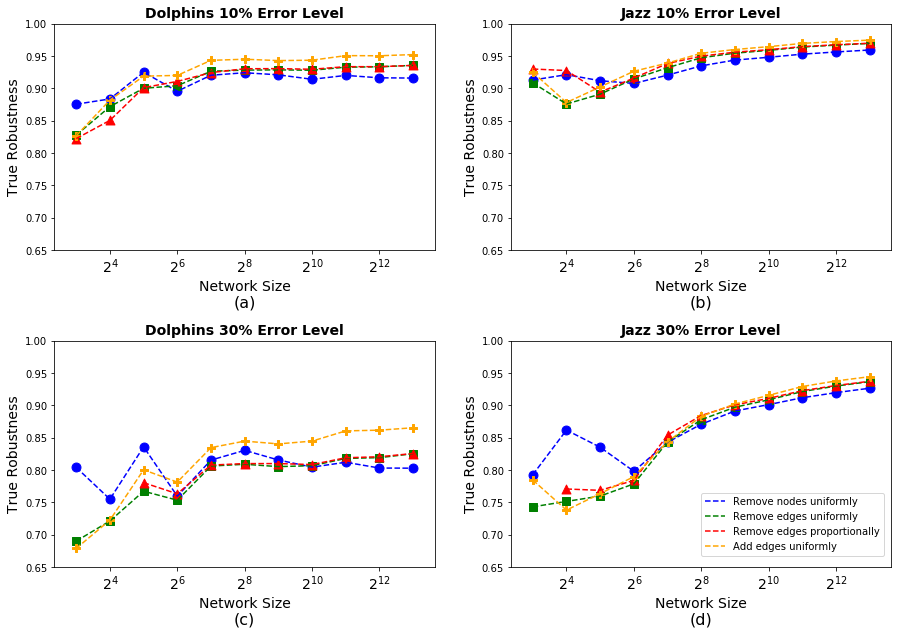

In [524]:
x = data_dolphins_degree
y = data_jazz_degree
ylim_low = 0.65
ylim_high = 1
plot_results(x, y, ylim_low, ylim_high, "./result_figures/degree_robustness.png")

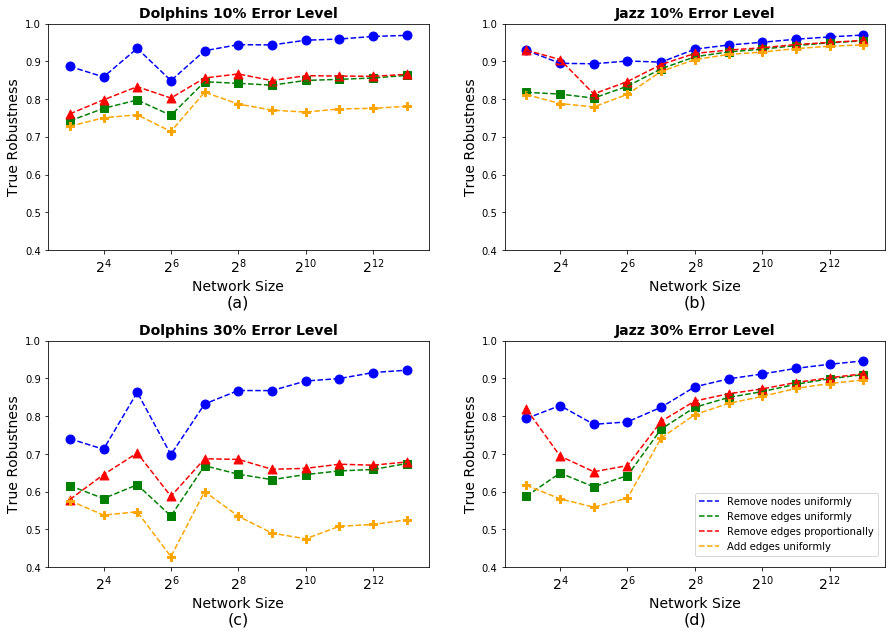

In [510]:
x = data_dolphins_eigenvector
y = data_jazz_eigenvector
ylim_low = 0.4
ylim_high = 1
plot_results(x, y, ylim_low, ylim_high, "./result_figures/eigenvector_robustness.png")

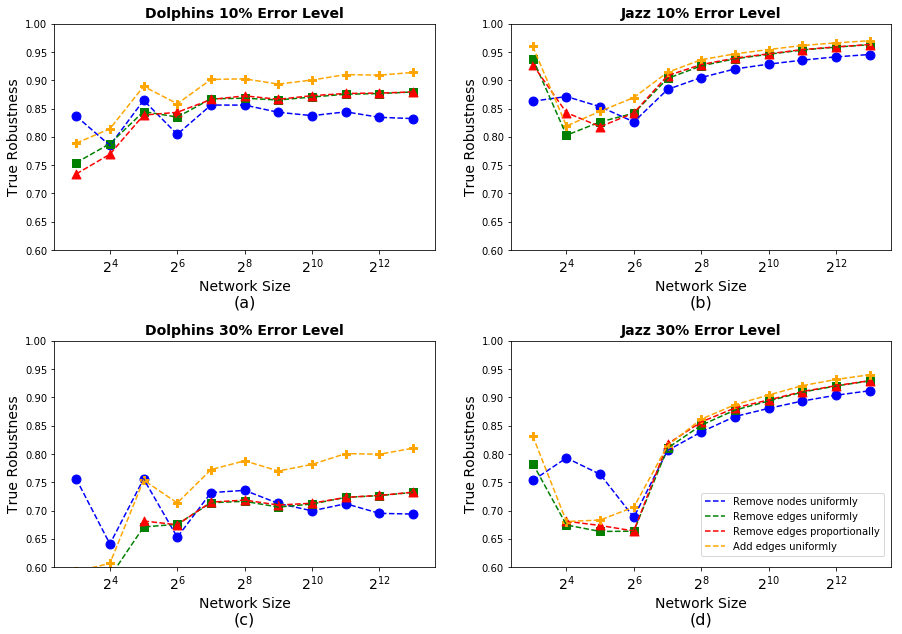

In [511]:
x = data_dolphins_pagerank
y = data_jazz_pagerank
ylim_low = 0.6
ylim_high = 1
plot_results(x, y, ylim_low, ylim_high, "./result_figures/pagerank_robustness.png")

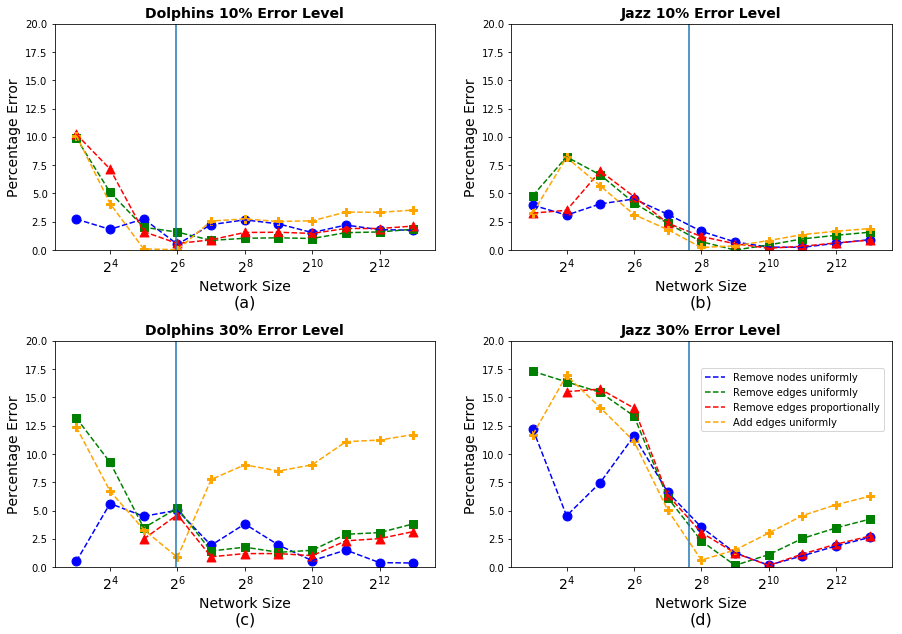

In [520]:
x = error_data_dolphins_degree
y = error_data_jazz_degree
ylim_low = 0
ylim_high = 20
plot_results(x, y, ylim_low, ylim_high, "./result_figures/degree_error.png", error=True)

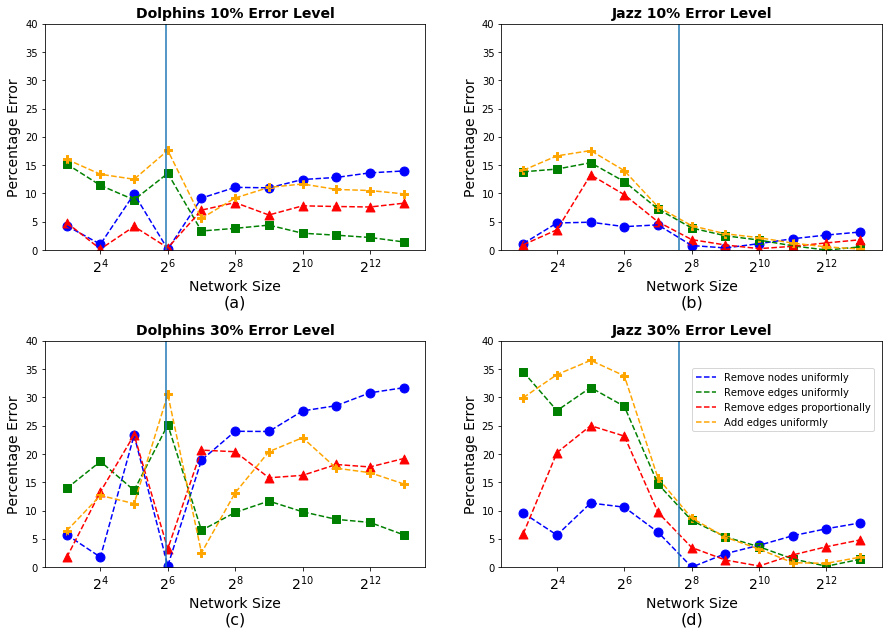

In [521]:
x = error_data_dolphins_eigenvector
y = error_data_jazz_eigenvector
ylim_low = 0
ylim_high = 40
plot_results(x, y, ylim_low, ylim_high, "./result_figures/eigenvector_error.png", error=True)

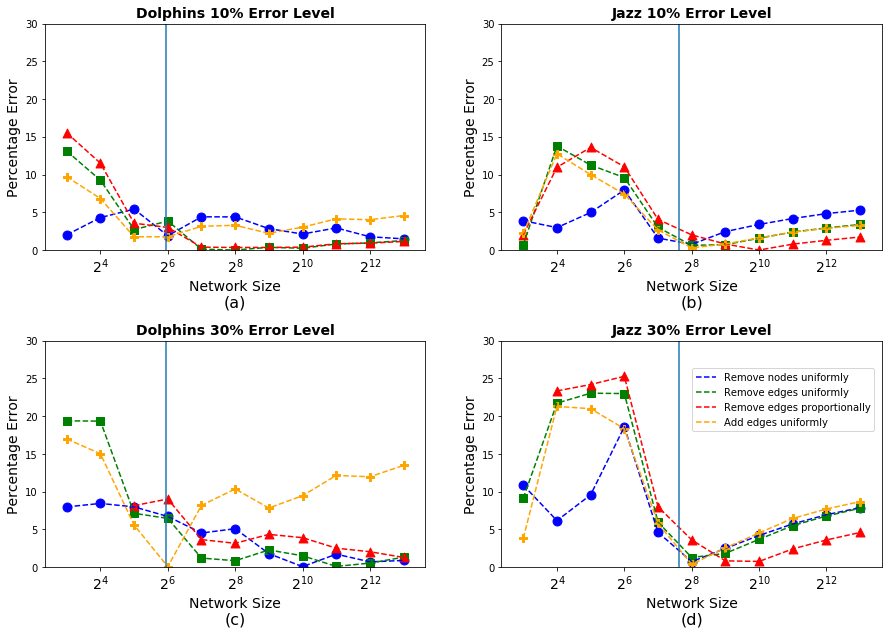

In [522]:
x = error_data_dolphins_pagerank
y = error_data_jazz_pagerank
ylim_low = 0
ylim_high = 30
plot_results(x, y, ylim_low, ylim_high, "./result_figures/pagerank_error.png", error=True)